In [26]:
import numpy as np
from numpy import exp, linspace, random
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [27]:
def data_generator(n, data, al, be, ga, de):

    # This function is used to generate ground
    # truth data based on the given function
    # First subplot is f(x) against the x value
    # Second subplot is f(x) against the number of data generated

    fx = al + be * data + ga * (data ** 2) + de * (data ** 3)

    plt.subplot(1, 2, 1)
    plt.plot(data, fx, 'r.')
    plt.ylabel('f(x)')
    plt.xlabel('x')

    plt.subplot(1, 2, 2)
    plt.plot(fx, 'bx')
    plt.xlabel('n')

    plt.show()
    return fx


def function_to_fit(x, a, b, c, d):

    # This function defines the given
    # polynomial function that needs to be fit

    return a + b * x + c * (x ** 2) + d * (x ** 3)


def nlin_fitting(x, y):

    # This function tries to fit the given
    # non-linear function and find the best params
    # This plots the original curve and the
    # curve with stated params in question (all ones)

    init_vals = [1.0, 1.0, 1.0, 1.0]
    best_vals, covar = curve_fit(function_to_fit, x, y, p0=init_vals)
    print('Best parameters: {}'.format(best_vals))
    y_hat = function_to_fit(x, *best_vals)
    print('y_hat : \n', y_hat, '\n')
    plt.plot(x, y, 'b|', label='data')
    plt.plot(x, function_to_fit(x, *init_vals), 'r--',
             label='initial fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(init_vals))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.show()
    return best_vals, y_hat


def make_mutative_array(init_, s):

    # This function iteratively mutates
    # successive generations
    # of a gene passed (set of params)

    arr = []
    for i in range(len(s)):
        if i == 0:
            arr.append(init_ + s[i])
        else:
            arr.append(s[i-1] + s[i])
    return np.array(arr)


def normpdf(bins, mu, sigma):

    # Gives normal pdf for the data

    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu) ** 2 / (2 * sigma ** 2))


def plot_histogram_subplots(mutated_parameters, mu, sigma, title_str):

    # This plots the histogram subplots
    # of iteratively mutated gene parameters

    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    count_a, bins_a, ignored_a = ax1.hist(mutated_parameters[0], 30, density=True)
    ax1.plot(bins_a, normpdf(bins_a, mu, sigma), linewidth=2, color='r')
    ax1.title.set_text('Histogram of ' + title_str[0])

    count_b, bins_b, ignored_b = ax2.hist(mutated_parameters[1], 30, density=True)
    ax2.plot(bins_b, normpdf(bins_b, mu, sigma), linewidth=2, color='r')
    ax2.title.set_text('Histogram of ' + title_str[1])
    plt.tight_layout()
    plt.show()


def gaussian_noise():

    # This generates gaussian noise to then add to the
    # gene parameters and plot them

    params = [0.0, 1.0]
    mu, sigma = 0.0, 0.1
    s = np.random.normal(mu, sigma, 100)

    mutated_parameters = np.array([make_mutative_array(params[i], s) for i in range(len(params))])
    plot_histogram_subplots(mutated_parameters, mu, sigma, ['alpha', 'beta'])


def population_gen():

    # Generates population of genes (population of size 100)
    # can be further parameterized

    mu, sigma = 0.0, 1.0
    parameters = [np.random.normal(mu, sigma, 100) for i in range(4)]
    population = np.array(parameters).T
    plot_histogram_subplots(population[:, [1, 2]].T, mu, sigma, ['beta', 'gamma'])
    # print(population)
    return population


def evolution(pop_, x, y):

    # Evolution of the generation of genes similar to
    # the survival of the fittest theory.
    # Best genes from a population are picked and
    # mutated to form stronger generations

    error_map = {}
    for idx, row in enumerate(pop_):
        rmse = np.sqrt(np.mean((y - function_to_fit(x, *row)) ** 2))
        error_map[idx] = rmse
    sorted_err_map = {k: v for k, v in sorted(error_map.items(), key=lambda item: item[1])}
    truncated_err_map = dict(itertools.islice(sorted_err_map.items(), 10))
    print(truncated_err_map)
    reduced_best_population = np.array([pop_[key] for key in truncated_err_map.keys()])
    new_pop = reduced_best_population.copy()
    mu, sigma = 0.0, 0.1
    s = np.random.normal(mu, sigma, 9)
    for idx, row in enumerate(reduced_best_population):
        new_pop = np.vstack((new_pop, np.array([make_mutative_array(row[i], s) for i in range(len(row))]).T))
    return new_pop, sorted_err_map

In [28]:
# initial parameters in the question
given_param = [-0.1, 0.3, -0.7, 0.1]
x_data_lim = [-1, 1]
num_of_x = [100, 200]
epochs = 10

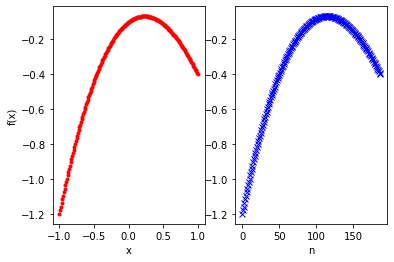

In [29]:
# Task 1
num = random.randint(num_of_x[0], num_of_x[1])
# x_data = random.uniform(-1, 1, num)
x_data = linspace(x_data_lim[0], x_data_lim[1], num)
y_data = data_generator(num, x_data, *given_param)

Best parameters: [-0.1  0.3 -0.7  0.1]
y_hat : 
 [-1.2        -1.17872389 -1.15767582 -1.13685506 -1.11626087 -1.09589251
 -1.07574926 -1.05583038 -1.03613514 -1.0166628  -0.99741262 -0.97838388
 -0.95957584 -0.94098776 -0.92261892 -0.90446857 -0.88653599 -0.86882044
 -0.85132118 -0.83403748 -0.81696861 -0.80011384 -0.78347242 -0.76704363
 -0.75082673 -0.73482099 -0.71902567 -0.70344004 -0.68806336 -0.67289491
 -0.65793394 -0.64317973 -0.62863153 -0.61428862 -0.60015026 -0.58621572
 -0.57248426 -0.55895515 -0.54562766 -0.53250104 -0.51957457 -0.50684752
 -0.49431914 -0.48198871 -0.46985549 -0.45791874 -0.44617774 -0.43463174
 -0.42328002 -0.41212184 -0.40115647 -0.39038317 -0.37980121 -0.36940985
 -0.35920836 -0.34919601 -0.33937206 -0.32973578 -0.32028643 -0.31102329
 -0.3019456  -0.29305265 -0.2843437  -0.27581802 -0.26747486 -0.2593135
 -0.2513332  -0.24353323 -0.23591285 -0.22847133 -0.22120794 -0.21412194
 -0.20721259 -0.20047917 -0.19392094 -0.18753717 -0.18132711 -0.17529005
 -0

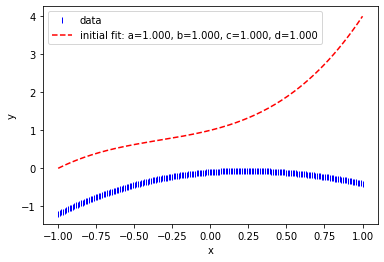

In [30]:
# Task 2
best_params, y_h = nlin_fitting(x_data, y_data)

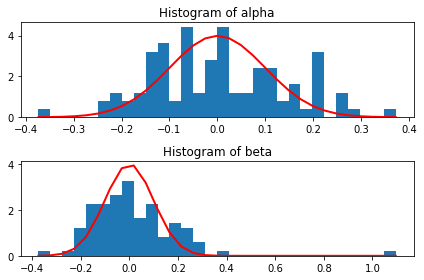

In [31]:
# Task 3
gaussian_noise()

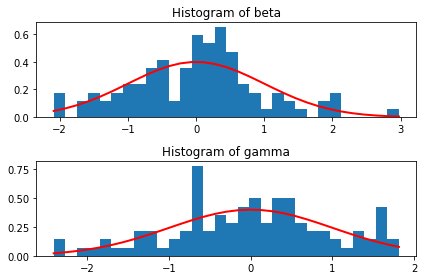

In [32]:
# Task 4
the_population = population_gen()

In [33]:
# A part of Task 5
print("Following are the best 10 genes obtained that will be further mutated")
evolved_population, sorted_error_dict = evolution(the_population, x_data, y_data)

Following are the best 10 genes obtained that will be further mutated
{49: 0.14941317283429284, 85: 0.24628136172754495, 13: 0.3165770809893614, 51: 0.3775696676337046, 77: 0.39629181770225413, 83: 0.4001581483125895, 23: 0.4122362395815895, 69: 0.45215376678060687, 73: 0.47680360257396615, 34: 0.4857004781939339}


In [34]:
# Remaining of Task 5 to generate population of size 100 and further evolution as per Task 6
error_dict_list = [sorted_error_dict.copy()]
for i in range(epochs-1):
    evolved_population, err_map = evolution(evolved_population, x_data, y_data)
    error_dict_list.append(err_map)
evolution_wise_dict = {}
for k in sorted_error_dict.keys():
    evolution_wise_dict[k] = list(evolution_wise_dict[k] for evolution_wise_dict in error_dict_list)
# print(evolution_wise_dict, len(evolution_wise_dict))

{0: 0.14941317283429284, 10: 0.16125702883887494, 19: 0.22764155407942568, 1: 0.24628136172754495, 2: 0.3165770809893614, 28: 0.31876530477633785, 37: 0.36107521096961426, 3: 0.3775696676337046, 64: 0.39357714122382603, 4: 0.39629181770225413}
{0: 0.14941317283429284, 1: 0.16125702883887494, 28: 0.17130320492771758, 37: 0.18414978026363607, 10: 0.20382067881448954, 19: 0.22246321197890376, 2: 0.22764155407942568, 3: 0.24628136172754495, 64: 0.3091857463193383, 4: 0.3165770809893614}
{10: 0.13527477181116232, 19: 0.13557910605583492, 0: 0.14941317283429284, 46: 0.15590245882005413, 1: 0.16125702883887494, 55: 0.16927931124185214, 2: 0.17130320492771758, 3: 0.18414978026363607, 4: 0.20382067881448954, 28: 0.217375715403927}
{0: 0.13527477181116232, 1: 0.13557910605583492, 2: 0.14941317283429284, 91: 0.1500438508822067, 3: 0.15590245882005413, 73: 0.15895132418788524, 4: 0.16125702883887494, 64: 0.16845535093502856, 5: 0.16927931124185214, 6: 0.17130320492771758}
{0: 0.13527477181116232, 

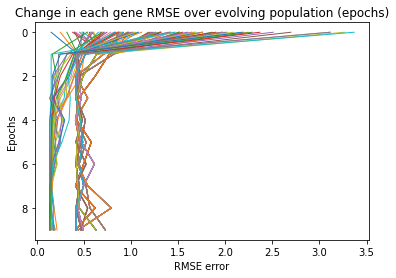

In [35]:
y_axis = range(epochs)
for key in evolution_wise_dict.keys():
    plt.plot(evolution_wise_dict[key], y_axis, linewidth=1)
plt.gca().invert_yaxis()
plt.xlabel('RMSE error')
plt.ylabel('Epochs')
plt.title('Change in each gene RMSE over evolving population (epochs)')
plt.show()